# Single model for all the months

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
# import all the monthly dataframes and save them in a dict
# add the cyclical features to these dataframes
#concat all the dataframes 
# run  models:
# default
# optimized
# with less features for optimized
# cannot do spatial split this time
# calculate r2 and rmse for all months separately and one big rmse or r2 for the entire model


In [3]:
#encode months as cyclical features

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [4]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
dataframes = {}

for i,month in enumerate(months):
    with open(f"final_df_{month}_new", 'rb') as file:
        final_df_month_new = pickle.load(file)
        final_df_month_new['month'] = i+1 
        final_df_month_new.insert(2,'month',final_df_month_new.pop('month')) # insertion index, name to insert, value to insert. pop deletes the column but also returns its value
        final_df_month_new = encode(final_df_month_new,'month',12)
    dataframes[month] = final_df_month_new

In [5]:
dataframes['dec']

,NO3-N [mg/l],NO3-N [mg/l] BC,month,station_name,station_number,water_body,lat,lon,slope_avg,elev_avg,...,soil_avg_06,soil_avg_07,soil_avg_08,soil_avg_09,soil_avg_10,tmin_avg_12,tmax_avg_12,prec_sum_12,month_sin,month_cos
0,5.122667,2.296457,12,"Strbr. in Höhe v. Stein, obh. KA",13516,Ölschnitz,50.062500,11.704167,216.0,584.0,...,15.0,18.0,1236.0,240.0,3.0,-25.0,20.0,10064.0,-2.449294e-16,1.0
1,4.369333,1.968703,12,Str.br.von Neundorf nach Bächlein,15123,Föritz,50.254167,11.212500,240.0,381.0,...,14.0,19.0,1287.0,240.0,4.0,-18.0,29.0,1932.0,-2.449294e-16,1.0
2,2.994500,1.369654,12,Strbr. Oberteich,23397,Seibertsbach,49.937500,12.212500,190.0,589.0,...,17.0,23.0,1215.0,240.0,6.0,-33.0,12.0,3416.0,-2.449294e-16,1.0
3,3.992667,1.841705,12,Straßenbr zum KW Oberelchingen,42442,Leibi,48.437500,10.104167,224.0,745.0,...,12.0,24.0,1269.0,234.0,7.0,-32.0,25.0,1026550.0,-2.449294e-16,1.0
4,7.006000,2.939097,12,Straßenbr oh Einmdg Kabisbach,102025,Edenhauser Bach,48.537500,10.912500,85.0,483.0,...,10.0,18.0,1315.0,240.0,4.0,-26.0,23.0,5250.0,-2.449294e-16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,6.893000,2.908309,12,800m uh. Wenigrötz,105645,Rötzerbach,49.329167,12.387500,148.0,476.0,...,16.0,14.0,1293.0,240.0,5.0,-30.0,17.0,3101.0,-2.449294e-16,1.0
488,0.892500,-0.187924,12,800m oh nordwestl Ammeraltwasser,113898,Waizackerbach,47.862500,11.129167,433.0,875.0,...,12.0,27.0,1260.0,230.0,8.0,-37.0,27.0,73941.0,-2.449294e-16,1.0
489,4.350500,1.999735,12,200m u.h. Bahnl. Markt Schwaben,130316,Forstinninger Sempt,48.212500,11.887500,49.0,544.0,...,10.0,22.0,1305.0,240.0,2.0,-38.0,22.0,17344.0,-2.449294e-16,1.0
490,4.972000,2.247549,12,700m oh Mündung in Ach,136340,Dinkelshausener Arrondierungskanal,48.645833,11.170833,96.0,417.0,...,9.0,20.0,1247.0,240.0,3.0,-25.0,25.0,11157.0,-2.449294e-16,1.0


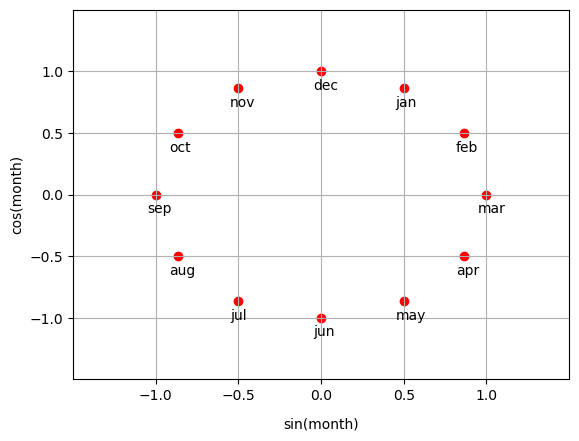

In [6]:
fig, ax = plt.subplots()


for month, df in dataframes.items():
    ax.scatter(df.iloc[0,-1], df.iloc[0,-2],c='red')
    ax.annotate(month, (df.iloc[0,-2]-0.05, df.iloc[0,-1]-0.15))
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5)
ax.set_xlabel('sin(month)')
ax.set_ylabel('cos(month)')
ax.set_xticks(np.arange(-1,1.1,0.5))
ax.set_yticks(np.arange(-1,1.1,0.5))
ax.xaxis.labelpad = 10
ax.grid()
plt.savefig('cyclic_features_months.jpg', format = 'jpg', bbox_inches = 'tight')

In [7]:
new_dataframes = {}
tmin = {}
tmax = {}
prec_sum = {}
i=1
for month in dataframes.keys():
    new_dataframes[month] = dataframes[month].rename(columns={f"tmin_avg_{i}": "tmin_avg", f"tmax_avg_{i}": "tmax_avg", f"prec_sum_{i}": "prec_sum" })
    i=i+1

In [8]:
new_dataframes

{'jan':      NO3-N [mg/l]  NO3-N [mg/l] BC  month                       station_name  \
 0        6.162333         2.671989      1   Strbr. in Höhe v. Stein, obh. KA   
 1        4.294000         1.977289      1  Str.br.von Neundorf nach Bächlein   
 2        8.701000         3.437690      1   Strbr. Höhe Äußerer Bürgergraben   
 3        3.446500         1.589518      1                   Strbr. Oberteich   
 4        3.465333         1.607559      1     Straßenbr zum KW Oberelchingen   
 ..            ...              ...    ...                                ...   
 485      7.910000         3.215839      1                 800m uh. Wenigrötz   
 486      0.625000        -0.434500      1   800m oh nordwestl Ammeraltwasser   
 487      4.520000         2.064355      1    200m u.h. Bahnl. Markt Schwaben   
 488      5.574667         2.456450      1             700m oh Mündung in Ach   
 489      1.168300         0.152725      1                 Augsburg Hochablaß   
 
     station_number

In [9]:
merged_dfs = pd.concat(new_dataframes.values()).reset_index(drop = True)

In [10]:
pd.options.display.max_rows = 1000

In [11]:
merged_dfs

,NO3-N [mg/l],NO3-N [mg/l] BC,month,station_name,station_number,water_body,lat,lon,slope_avg,elev_avg,...,soil_avg_06,soil_avg_07,soil_avg_08,soil_avg_09,soil_avg_10,tmin_avg,tmax_avg,prec_sum,month_sin,month_cos
0,6.162333,2.671989,1,"Strbr. in Höhe v. Stein, obh. KA",13516,Ölschnitz,50.062500,11.704167,216.0,584.0,...,15.0,18.0,1236.0,240.0,3.0,-43.0,7.0,9312.0,5.000000e-01,0.866025
1,4.294000,1.977289,1,Str.br.von Neundorf nach Bächlein,15123,Föritz,50.254167,11.212500,240.0,381.0,...,14.0,19.0,1287.0,240.0,4.0,-40.0,12.0,1744.0,5.000000e-01,0.866025
2,8.701000,3.437690,1,Strbr. Höhe Äußerer Bürgergraben,20496,Schwabbach,49.987500,9.979167,118.0,303.0,...,8.0,24.0,1282.0,236.0,8.0,-34.0,19.0,5427.0,5.000000e-01,0.866025
3,3.446500,1.589518,1,Strbr. Oberteich,23397,Seibertsbach,49.937500,12.212500,190.0,589.0,...,17.0,23.0,1215.0,240.0,6.0,-53.0,0.0,2992.0,5.000000e-01,0.866025
4,3.465333,1.607559,1,Straßenbr zum KW Oberelchingen,42442,Leibi,48.437500,10.104167,224.0,745.0,...,12.0,24.0,1269.0,234.0,7.0,-46.0,15.0,904499.0,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5892,6.893000,2.908309,12,800m uh. Wenigrötz,105645,Rötzerbach,49.329167,12.387500,148.0,476.0,...,16.0,14.0,1293.0,240.0,5.0,-30.0,17.0,3101.0,-2.449294e-16,1.000000
5893,0.892500,-0.187924,12,800m oh nordwestl Ammeraltwasser,113898,Waizackerbach,47.862500,11.129167,433.0,875.0,...,12.0,27.0,1260.0,230.0,8.0,-37.0,27.0,73941.0,-2.449294e-16,1.000000
5894,4.350500,1.999735,12,200m u.h. Bahnl. Markt Schwaben,130316,Forstinninger Sempt,48.212500,11.887500,49.0,544.0,...,10.0,22.0,1305.0,240.0,2.0,-38.0,22.0,17344.0,-2.449294e-16,1.000000
5895,4.972000,2.247549,12,700m oh Mündung in Ach,136340,Dinkelshausener Arrondierungskanal,48.645833,11.170833,96.0,417.0,...,9.0,20.0,1247.0,240.0,3.0,-25.0,25.0,11157.0,-2.449294e-16,1.000000


In [12]:
def pearson_corr_coeff(X,y):
    X_bar = np.mean(X)
    y_bar = np.mean(y)
    numr = np.sum((X-X_bar)*(y-y_bar))
    denmr = np.sqrt(np.sum(np.square(X-X_bar)*np.sum(np.square(y-y_bar))))
    r = numr/denmr
    return r

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_dfs.iloc[:,8:])
scaled_df = pd.DataFrame(scaled_features, index=merged_dfs.index, columns=merged_dfs.columns[8:])
scaled_df = scaled_df.astype('float32')  # Explicitly cast to float32 if needed because the data type might not match

# Replace the original data with the scaled data
merged_dfs_scaled = merged_dfs.copy()
merged_dfs_scaled.iloc[:, 8:] = scaled_df

X = merged_dfs_scaled.iloc[:,8:]
y = merged_dfs_scaled.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_indices = X_train.index
test_indices = X_test.index

In [14]:
merged_dfs_scaled

,NO3-N [mg/l],NO3-N [mg/l] BC,month,station_name,station_number,water_body,lat,lon,slope_avg,elev_avg,...,soil_avg_06,soil_avg_07,soil_avg_08,soil_avg_09,soil_avg_10,tmin_avg,tmax_avg,prec_sum,month_sin,month_cos
0,6.162333,2.671989,1,"Strbr. in Höhe v. Stein, obh. KA",13516,Ölschnitz,50.062500,11.704167,-0.116886,-0.054875,...,0.516642,-0.651119,-0.840513,0.525972,-0.740898,-1.321091,-1.497966,-0.340873,0.707679,1.224346
1,4.294000,1.977289,1,Str.br.von Neundorf nach Bächlein,15123,Föritz,50.254167,11.212500,-0.029112,-0.813065,...,0.264562,-0.384458,0.311506,0.525972,-0.541452,-1.270246,-1.433396,-0.348706,0.707679,1.224346
2,8.701000,3.437690,1,Strbr. Höhe Äußerer Bürgergraben,20496,Schwabbach,49.987500,9.979167,-0.475297,-1.104389,...,-1.247917,0.948846,0.198563,0.121228,0.256335,-1.168557,-1.342997,-0.344894,0.707679,1.224346
3,3.446500,1.589518,1,Strbr. Oberteich,23397,Seibertsbach,49.937500,12.212500,-0.211974,-0.036200,...,1.020801,0.682185,-1.314874,0.525972,-0.142559,-1.490572,-1.588364,-0.347414,0.707679,1.224346
4,3.465333,1.607559,1,Straßenbr zum KW Oberelchingen,42442,Leibi,48.437500,10.104167,-0.087628,0.546448,...,-0.239598,0.948846,-0.095089,-0.081144,0.056888,-1.371935,-1.394654,0.585672,0.707679,1.224346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5892,6.893000,2.908309,12,800m uh. Wenigrötz,105645,Rötzerbach,49.329167,12.387500,-0.365579,-0.458247,...,0.768721,-1.717762,0.447038,0.525972,-0.342005,-1.100765,-1.368825,-0.347302,0.000392,1.413766
5893,0.892500,-0.187924,12,800m oh nordwestl Ammeraltwasser,113898,Waizackerbach,47.862500,11.129167,0.676738,1.031988,...,-0.239598,1.748828,-0.298386,-0.485889,0.256335,-1.219402,-1.239685,-0.273980,0.000392,1.413766
5894,4.350500,1.999735,12,200m u.h. Bahnl. Markt Schwaben,130316,Forstinninger Sempt,48.212500,11.887500,-0.727647,-0.204272,...,-0.743757,0.415524,0.718101,0.525972,-0.940345,-1.236350,-1.304255,-0.332560,0.000392,1.413766
5895,4.972000,2.247549,12,700m oh Mündung in Ach,136340,Dinkelshausener Arrondierungskanal,48.645833,11.170833,-0.555756,-0.678608,...,-0.995837,-0.117797,-0.592038,0.525972,-0.740898,-1.016024,-1.265513,-0.338963,0.000392,1.413766


In [16]:
with open('merged_dfs_scaled_CRS', 'wb') as file:
    pickle.dump(merged_dfs_scaled, file)

# Default Models
Run the model with the default hyperparameters from sklearn

In [82]:
model_default_merged = RandomForestRegressor(random_state = 42, n_jobs=10)
model_default_merged.fit(X_train, y_train)
y_pred_default_merged = model_default_merged.predict(X_test)
rmse_model_default_merged = np.sqrt(mean_squared_error(y_test, y_pred_default_merged))
r2_model_default_merged = r2_score(y_test, y_pred_default_merged)
r_model_default_merged = pearson_corr_coeff(y_test, y_pred_default_merged)
print('RMSE, model = default merged: ',rmse_model_default_merged)
print('R2, model = default merged: ', r2_model_default_merged)
print('R, model = default merged: ', r_model_default_merged)

RMSE, model = default merged:  0.30505337854474046
R2, model = default merged:  0.9167696819276507
R, model = default merged:  0.9577687311837294


In [86]:
# Calculate the goodness of fit for monthly subsets
# extract the datafame for just the test indices
# extract the indices where the month is equal to the given month
# extract the y_test and y_pred values at these indices and compute gof

df_test = merged_dfs_scaled.iloc[test_indices,:].reset_index(drop = True)  # Extract all the data in the test set dataframe and reset its index to match the indexy range of y_predict
y_test_reset_ind = y_test.reset_index(drop = True)    # y_test had row indices of the original dataframe. Reset index to match index of y_predict
df_train = merged_dfs_scaled.iloc[train_indices,:].reset_index(drop = True)
# save the data in a dictionary. keys are the month names. These dicts will later be used to generate figures.
rmse_Months_default_merged = {}
r2_Months_default_merged = {}
r_Months_default_merged = {}
y_pred_Months_default_merged = {}
y_test_Months_default_merged = {}
df_months = {}
df_trains = {}
for i, month in enumerate(months):
                         
    df_test_month = df_test.loc[df_test['month'] == (i+1),:]   # Extract the data from test set corresponding to the given month
    df_train_month = df_train.loc[df_train['month'] == (i+1),:]
    df_test_month_indices = df_test_month.index                # Extract the indices from the test set that correspond to the given month
    # only calculate the error metrics for a subset of the test set. Subset based on the given month. 
    y_test_month = y_test_reset_ind[df_test_month_indices]
    y_pred_month = y_pred_default_merged[df_test_month_indices]
    
    rmse_month_default_merged = np.sqrt(mean_squared_error(y_test_month, y_pred_month))
    r2_month_default_merged = r2_score(y_test_month, y_pred_month)
    r_month_default_merged = pearson_corr_coeff(y_test_month, y_pred_month)

    # add data to the dictionaries
    rmse_Months_default_merged[month] = rmse_month_default_merged
    r2_Months_default_merged[month] = r2_month_default_merged
    r_Months_default_merged[month] = r_month_default_merged
    y_pred_Months_default_merged[month] = y_pred_month
    y_test_Months_default_merged[month] = y_test_month
    df_months[month] = df_test_month
    df_trains[month] = df_train_month
    # print gof metrics for each month
    print(f'RMSE default for {month} = {np.round(rmse_Months_default_merged[month],5)}')
    print(f'R2 default for {month} = {np.round(r2_Months_default_merged[month],5)}')
    print(f'R default for {month} = {np.round(r_Months_default_merged[month], 5)}')
    print('')

RMSE default for jan = 0.24712
R2 default for jan = 0.95282
R default for jan = 0.97639

RMSE default for feb = 0.28098
R2 default for feb = 0.9254
R default for feb = 0.96468

RMSE default for mar = 0.24438
R2 default for mar = 0.9453
R default for mar = 0.97608

RMSE default for apr = 0.30815
R2 default for apr = 0.91654
R default for apr = 0.96063

RMSE default for may = 0.20767
R2 default for may = 0.95935
R default for may = 0.9796

RMSE default for jun = 0.28037
R2 default for jun = 0.93401
R default for jun = 0.96845

RMSE default for jul = 0.35506
R2 default for jul = 0.88409
R default for jul = 0.9418

RMSE default for aug = 0.31526
R2 default for aug = 0.91276
R default for aug = 0.95657

RMSE default for sep = 0.46094
R2 default for sep = 0.7682
R default for sep = 0.87677

RMSE default for oct = 0.31188
R2 default for oct = 0.90304
R default for oct = 0.95496

RMSE default for nov = 0.28513
R2 default for nov = 0.90052
R default for nov = 0.9497

RMSE default for dec = 0.33

In [21]:
df_test

,NO3-N [mg/l],NO3-N [mg/l] BC,month,station_name,station_number,water_body,lat,lon,slope_avg,elev_avg,...,soil_avg_06,soil_avg_07,soil_avg_08,soil_avg_09,soil_avg_10,tmin_avg,tmax_avg,prec_sum,month_sin,month_cos
0,5.122667,2.246750,12,o.h. Weihermuehle,121129,Satzbach,48.612500,13.520833,-0.519833,-0.656362,...,-0.240589,-1.185488,0.063803,0.526120,-0.541713,-1.134607,-1.265525,-0.347347,0.000392,1.413766
1,4.802500,2.116714,5,Strbr. Moerlach-Haag,3630,Altmühl,49.179167,10.620833,-0.592951,-0.540647,...,0.011455,-0.651939,0.944632,0.526120,-0.541713,0.594083,0.684521,-0.302610,0.707679,-1.224521
2,3.898500,1.791324,4,"Bruecke PA7 _ PA14, zw. Hirschenauer Muehle un...",103452,Vornbacher Bach,48.487500,13.404167,-0.413812,-0.757146,...,-1.500810,-0.118390,1.125314,0.526120,-0.940201,-0.100782,0.322923,-0.348122,1.225449,-0.707015
3,2.787333,1.216039,7,150m oh. Br. Mitterscheyern,206390,Pudelbach,48.512500,11.462500,-0.640478,-0.398802,...,-0.492634,-0.918714,0.289657,0.526120,-0.342469,1.441481,1.356061,-0.334087,-0.706895,-1.224521
4,3.938857,1.824469,11,250 m uh Br Am Hachinger Bach,105623,Hachinger Bach,48.087500,11.620833,-0.688005,0.067791,...,-0.996722,0.681933,0.379998,0.526120,-0.940201,-0.609221,-0.761871,-0.339350,-0.706895,1.224346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1.053789,0.047478,7,Teisnach Pegel,8228,Schwarzer Regen,49.045833,13.004167,0.514789,0.127515,...,1.523719,-1.185488,-0.229806,0.526120,0.056019,1.322845,1.291489,-0.330788,-0.706895,-1.224521
1176,3.525600,1.629391,2,NEUSTADT Bruecke B299,3317,Donau,48.812500,11.737500,-0.099404,0.317885,...,-0.492634,0.681933,0.041218,-0.080455,0.056019,-1.236295,-1.175126,1.783935,1.225449,0.706839
1177,6.351179,2.726920,3,Schönach Pegel,10529,Große Laber,48.920833,12.420833,-0.611231,-0.667560,...,-0.996722,-0.651939,0.560681,0.526120,-0.740957,-0.677013,-0.542329,-0.316475,1.414966,-0.000088
1178,2.561333,1.140882,4,HOFHAM,11239,Isar,48.512500,12.079167,0.485541,0.668763,...,-0.240589,1.215481,-0.636342,-0.788125,0.454507,-0.185522,0.012982,0.661869,1.225449,-0.707015


In [75]:
df_months['sep']

,NO3-N [mg/l],NO3-N [mg/l] BC,month,station_name,station_number,water_body,lat,lon,slope_avg,elev_avg,...,soil_avg_06,soil_avg_07,soil_avg_08,soil_avg_09,soil_avg_10,tmin_avg,tmax_avg,prec_sum,month_sin,month_cos
18,3.842000,1.777786,9,Brücke oh. Mdg.,9472,Perlbach,49.179167,12.479167,0.448982,0.075256,...,1.523719,-1.185488,-0.342733,0.526120,-0.143225,0.763563,0.787835,-0.071835,-1.414182,-0.000088
34,3.446500,1.595763,9,"Unterzettlitz, Pegel bei Brücke",14442,Roter Main,50.070833,11.429167,-0.150587,-0.514518,...,0.515543,-0.651939,0.176730,0.222832,-0.143225,0.746615,0.774921,-0.293794,-1.414182,-0.000088
53,0.859000,-0.148240,9,uh. Fischteiche,103324,Anhauser Bach,48.304167,10.762500,-0.581984,-0.130045,...,-0.240589,-0.118390,-0.387903,0.526120,-0.740957,0.916094,0.865320,-0.347863,-1.414182,-0.000088
66,1.508750,0.444486,9,Dimpflmuehle Bruecke,11852,Kleine Ohe,48.854167,13.379167,0.328337,0.702358,...,1.271675,-0.918714,-0.907366,0.526120,-0.342469,0.611031,0.710350,-0.335887,-1.414182,-0.000088
68,3.164000,1.461063,9,"Schonungen, Bachstraße",113524,Steinach,50.045833,10.304167,-0.344350,-0.723551,...,0.011455,-0.385165,0.379998,0.020641,0.056019,0.797459,0.852406,0.894909,-1.414182,-0.000088
77,5.461667,2.418166,9,BRUECKE VOLKERSDORF,3365,Ilm,48.437500,11.404167,-0.728220,-0.339079,...,-0.744678,-0.918714,0.334827,0.526120,-0.541713,0.848303,0.826578,-0.344325,-1.414182,-0.000088
82,1.231500,0.205691,9,Bruecke oh Mdg in Loisach,103162,Sindelsbach,47.712500,11.337500,-0.187146,0.276825,...,-0.996722,2.282579,1.034973,0.526120,-0.541713,0.966938,0.916977,-0.346704,-1.414182,-0.000088
90,3.744270,1.725590,9,Rothenfels KW-OW,21413,Main,49.904167,9.587500,-0.300479,-0.805672,...,-0.240589,-0.118390,0.470339,0.121737,0.056019,0.831355,0.878235,1.426190,-1.414182,-0.000088
101,4.256333,1.819798,9,"Egermühle, Steg",2927,Eger,48.812500,10.629167,-0.516177,-0.428664,...,-0.744678,-0.118390,1.012388,0.222832,-0.143225,0.882198,0.891149,-0.300795,-1.414182,-0.000088
116,4.218667,1.932785,9,"0,5 km uh. KA Enslingen",102033,Arenbach,48.945833,10.479167,-0.552736,-0.451061,...,-0.240589,-0.918714,1.351168,0.526120,-0.342469,0.865251,0.865320,-0.346954,-1.414182,-0.000088


In [87]:
df_trains['sep']

,NO3-N [mg/l],NO3-N [mg/l] BC,month,station_name,station_number,water_body,lat,lon,slope_avg,elev_avg,...,soil_avg_06,soil_avg_07,soil_avg_08,soil_avg_09,soil_avg_10,tmin_avg,tmax_avg,prec_sum,month_sin,month_cos
1,0.686424,-0.351654,9,Baierbrunn oh Ausleitung,10909,Isar,48.029167,11.504167,2.357366,2.061077,...,1.019631,2.015805,-2.014047,-3.012231,2.646192,0.780511,0.749092,0.077636,-1.414182,-0.000088
8,2.594400,1.129391,9,oh.Kirchehrenbach,18416,Ehrenbach,49.729167,11.162500,0.357585,-0.600371,...,0.263499,0.415158,0.899461,-2.102370,2.247704,0.763563,0.826578,-0.348936,-1.414182,-0.000088
19,2.011333,0.805802,9,TEISNACH PEGEL,8244,Teisnach,49.037500,12.995833,0.525756,0.138713,...,1.523719,-1.185488,-0.229806,0.526120,0.056019,0.729667,0.774921,-0.337061,-1.414182,-0.000088
32,4.237500,1.949347,9,Strbr. Wasserzell,16234,Fränkische Rezat,49.320833,10.537500,-0.464995,-0.514518,...,0.263499,-0.651939,0.651022,0.526120,-0.342469,0.831355,0.865320,-0.339229,-1.414182,-0.000088
69,2.455778,1.072238,9,Br. Dünzlau,3195,Schutter,48.779167,11.329167,-0.472306,-0.574242,...,-0.492634,0.148384,0.696193,-0.484838,0.454507,0.882198,0.904063,-0.326423,-1.414182,-0.000088
87,5.133429,2.306782,9,BAD GOEGGING BRUECKE,3357,Abens,48.820833,11.779167,-0.625855,-0.596638,...,-0.744678,-0.918714,0.492925,0.425024,-0.342469,0.865251,0.865320,-0.301579,-1.414182,-0.000088
95,3.968780,1.822450,9,Neumuehle,16961,Rednitz,49.429167,10.995833,-0.530801,-0.656362,...,0.263499,-0.918714,0.718778,0.323928,-0.143225,0.848303,0.878235,-0.159588,-1.414182,-0.000088
115,3.254400,1.498324,9,"Seitenkanal, oh. Schleuse Bug",19232,Main-Donau-Kanal,49.879167,10.912500,-0.450371,-0.749681,...,0.011455,-0.651939,0.560681,-0.080455,0.255263,0.814407,0.865320,0.384845,-1.414182,-0.000088
125,4.670667,2.128303,9,"0,7km oh.Hundsbach,FT",23473,Hundsbach,50.020833,12.329167,-0.337038,-0.092717,...,1.019631,-0.385165,-0.749269,0.526120,-0.342469,0.729667,0.723264,-0.324859,-1.414182,-0.000088
146,3.059375,1.071935,9,uh KA Langenbach,105588,Langenbach,48.454167,11.854167,-0.355317,0.082722,...,-0.996722,0.948707,0.108974,0.323928,-0.740957,0.899146,0.839492,0.088700,-1.414182,-0.000088


In [23]:
# Calculate learning curve metrics

learning_curve_model_default =  RandomForestRegressor(random_state=42)

train_sizes_default, train_scores_default, test_scores_default = learning_curve(estimator = learning_curve_model_default, X=X, y=y,
                                                       cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate training and test mean and std

train_mean_default = np.mean(train_scores_default, axis=1)
train_std_default = np.std(train_scores_default, axis=1)
test_mean_default = np.mean(test_scores_default, axis=1)
test_std_default = np.std(test_scores_default, axis=1)

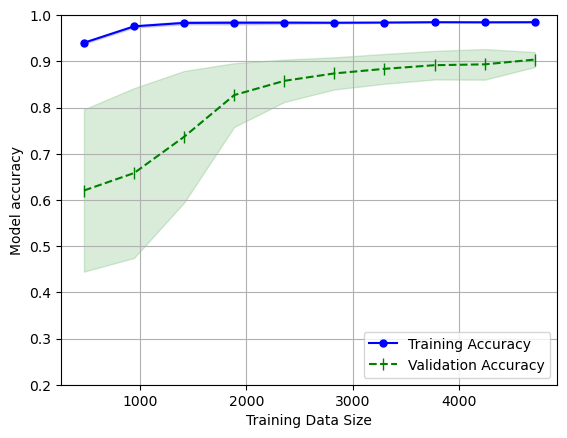

In [46]:
# Plot the learning curve

plt.plot(train_sizes_default, train_mean_default, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes_default, train_mean_default + train_std_default, train_mean_default - train_std_default, alpha=0.15, color='blue')
plt.plot(train_sizes_default, test_mean_default, color='green', marker='|', markersize=8, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes_default, test_mean_default + test_std_default, test_mean_default - test_std_default, alpha=0.15, color='green')
#plt.title('Learning Curve - Random Forest Method')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.ylim(0.2,1.0)
plt.grid()
plt.legend(loc='lower right')
plt.savefig('LearningCurve_default_merged_dpi300.jpg', format = 'jpg', bbox_inches = 'tight',dpi=300)
plt.show()

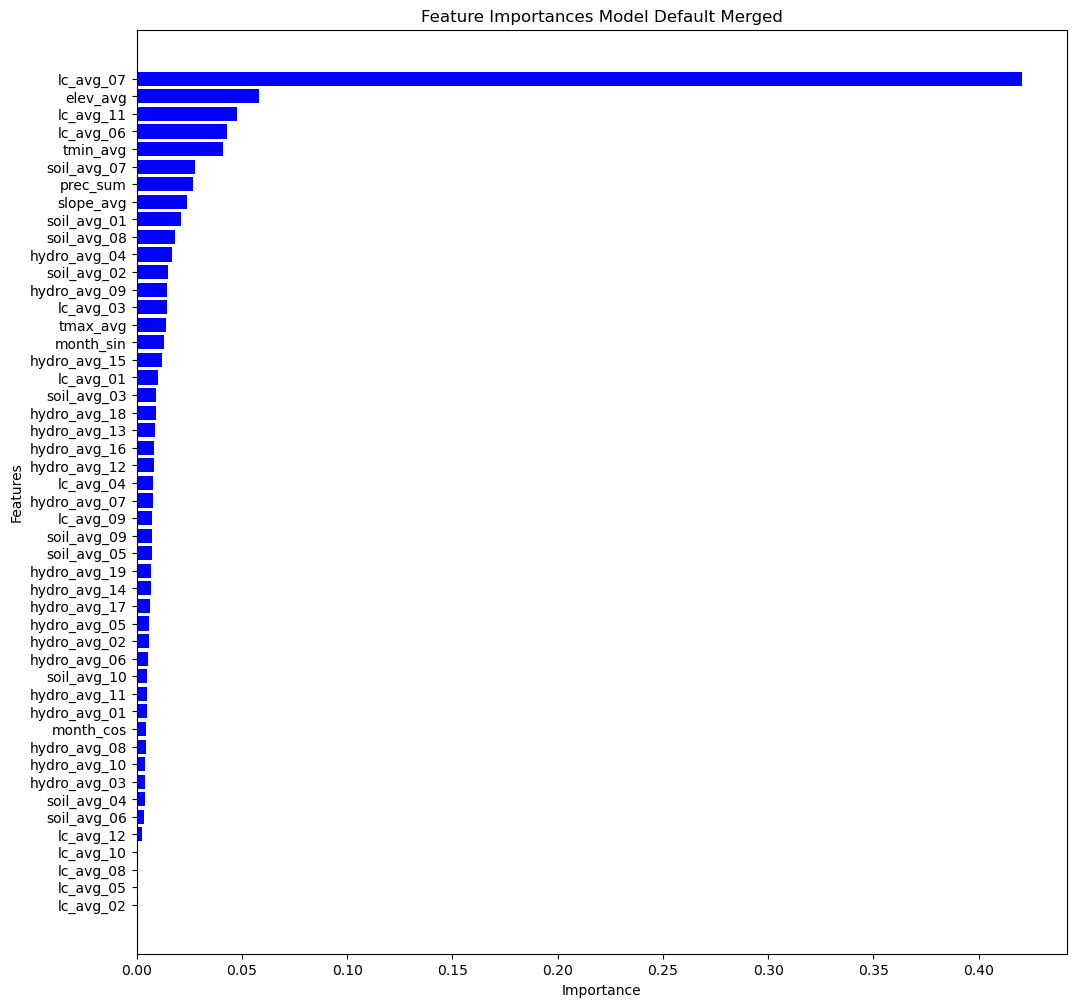

In [57]:
feature_importances_default_merged = model_default_merged.feature_importances_

indices = np.argsort(feature_importances_default_merged)

# Prepare the figure
plt.figure(figsize=(12, 12))
plt.title('Feature Importances Model Default Merged')

# Create horizontal bars
plt.barh(range(len(indices)), feature_importances_default_merged[indices], color='b', align='center')

# Add feature names as y-tick labels
plt.yticks(range(len(indices)), [merged_dfs.columns[8:][i] for i in indices])

# Label the axes
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('feature_importance_default_merged.jpg', format = 'jpg', bbox_inches = 'tight')
# Show the plot
plt.show()

# Optimized models
Using optuna to get the optimal hyperparameters

In [26]:
# Optimization of model: with spatial split, using box cox transformed data

def objective_opt_merged(trial):
    n_estimators = trial.suggest_int("n_estimators", 1, 1200)
    max_depth = trial.suggest_int("max_depth", 1, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 30)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 25)

    model_tuning = RandomForestRegressor(n_estimators =n_estimators, max_depth =max_depth, 
                                         min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, random_state = 42)
    score = cross_val_score(model_tuning, X_train, y_train, cv=5, scoring = "r2", n_jobs=10)
    mean_score = score.mean()  
    return mean_score

In [27]:
study_opt_merged =  optuna.create_study(direction = "maximize", sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-06-14 20:32:23,930] A new study created in memory with name: no-name-6f0f472f-05c0-43ce-bb22-8d4d051c3e98


In [29]:
study_opt_merged.optimize(objective_opt_merged, n_trials = 1000, n_jobs=10)

[I 2024-06-14 20:38:34,443] Trial 10 finished with value: 0.8478872131234727 and parameters: {'n_estimators': 232, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8877408825889598.
[I 2024-06-14 20:38:58,095] Trial 12 finished with value: 0.49847520387135286 and parameters: {'n_estimators': 268, 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.8877408825889598.
[I 2024-06-14 20:40:05,734] Trial 11 finished with value: 0.49851434696963925 and parameters: {'n_estimators': 663, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.8877408825889598.
[I 2024-06-14 20:40:29,979] Trial 15 finished with value: 0.7837178935396306 and parameters: {'n_estimators': 185, 'max_depth': 39, 'min_samples_split': 15, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.8877408825889598.
[I 2024-06-14 20:40:46,893] Trial 13 finished with value: 0.6455340740714444 and pa

[I 2024-06-14 20:57:35,392] Trial 47 finished with value: 0.8114755013984597 and parameters: {'n_estimators': 375, 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 14}. Best is trial 20 with value: 0.8976835171764339.
[I 2024-06-14 20:58:15,399] Trial 49 finished with value: 0.7906079889617448 and parameters: {'n_estimators': 27, 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 17}. Best is trial 20 with value: 0.8976835171764339.
[I 2024-06-14 20:58:17,769] Trial 45 finished with value: 0.7698645885050406 and parameters: {'n_estimators': 1143, 'max_depth': 44, 'min_samples_split': 30, 'min_samples_leaf': 22}. Best is trial 20 with value: 0.8976835171764339.
[I 2024-06-14 20:59:19,989] Trial 48 finished with value: 0.8080612395115236 and parameters: {'n_estimators': 1024, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 14}. Best is trial 20 with value: 0.8976835171764339.
[I 2024-06-14 21:00:28,971] Trial 50 finished with value: 0.8056115730606613 

[I 2024-06-14 21:17:29,748] Trial 82 finished with value: 0.8055880676565303 and parameters: {'n_estimators': 852, 'max_depth': 36, 'min_samples_split': 19, 'min_samples_leaf': 15}. Best is trial 20 with value: 0.8976835171764339.
[I 2024-06-14 21:18:56,692] Trial 84 finished with value: 0.8420314287649626 and parameters: {'n_estimators': 655, 'max_depth': 20, 'min_samples_split': 24, 'min_samples_leaf': 8}. Best is trial 20 with value: 0.8976835171764339.
[I 2024-06-14 21:19:34,829] Trial 85 finished with value: 0.7570642559490188 and parameters: {'n_estimators': 413, 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 25}. Best is trial 20 with value: 0.8976835171764339.
[I 2024-06-14 21:19:51,796] Trial 83 finished with value: 0.909022238376514 and parameters: {'n_estimators': 633, 'max_depth': 49, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 83 with value: 0.909022238376514.
[I 2024-06-14 21:20:05,943] Trial 88 finished with value: 0.8249325816579104 and 

[I 2024-06-14 21:36:29,217] Trial 116 finished with value: 0.8178204745313096 and parameters: {'n_estimators': 851, 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 13}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:36:52,488] Trial 117 finished with value: 0.7611564083088374 and parameters: {'n_estimators': 1063, 'max_depth': 45, 'min_samples_split': 6, 'min_samples_leaf': 24}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:37:57,461] Trial 120 finished with value: 0.8871939762287411 and parameters: {'n_estimators': 688, 'max_depth': 34, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:37:58,148] Trial 121 finished with value: 0.6893684121688137 and parameters: {'n_estimators': 1016, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 14}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:38:38,926] Trial 122 finished with value: 0.82458331

[I 2024-06-14 21:53:54,795] Trial 154 finished with value: 0.8384473325389397 and parameters: {'n_estimators': 800, 'max_depth': 19, 'min_samples_split': 26, 'min_samples_leaf': 8}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:55:08,946] Trial 157 finished with value: 0.8224450253772482 and parameters: {'n_estimators': 704, 'max_depth': 31, 'min_samples_split': 26, 'min_samples_leaf': 12}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:55:10,862] Trial 156 finished with value: 0.8933150800713964 and parameters: {'n_estimators': 407, 'max_depth': 26, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:55:21,769] Trial 155 finished with value: 0.8114425943432219 and parameters: {'n_estimators': 1197, 'max_depth': 37, 'min_samples_split': 12, 'min_samples_leaf': 14}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 21:57:10,784] Trial 158 finished with value: 0.871190446

[I 2024-06-14 22:09:13,441] Trial 187 finished with value: 0.8397740753861849 and parameters: {'n_estimators': 1167, 'max_depth': 46, 'min_samples_split': 16, 'min_samples_leaf': 10}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:09:46,708] Trial 190 finished with value: 0.7742833885392643 and parameters: {'n_estimators': 982, 'max_depth': 31, 'min_samples_split': 28, 'min_samples_leaf': 21}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:10:11,421] Trial 192 finished with value: 0.8224861579625923 and parameters: {'n_estimators': 487, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:10:49,467] Trial 193 finished with value: 0.850027778723161 and parameters: {'n_estimators': 759, 'max_depth': 31, 'min_samples_split': 26, 'min_samples_leaf': 5}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:10:56,980] Trial 194 finished with value: 0.57751742

[I 2024-06-14 22:26:39,618] Trial 223 finished with value: 0.761136840741638 and parameters: {'n_estimators': 1058, 'max_depth': 42, 'min_samples_split': 12, 'min_samples_leaf': 24}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:26:55,063] Trial 226 finished with value: 0.8178496724395569 and parameters: {'n_estimators': 444, 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 13}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:27:33,932] Trial 228 finished with value: 0.6473370288281971 and parameters: {'n_estimators': 1029, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 8}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:27:34,529] Trial 230 finished with value: 0.6815332241593858 and parameters: {'n_estimators': 41, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 18}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:27:52,466] Trial 229 finished with value: 0.76748290297

[I 2024-06-14 22:42:07,281] Trial 263 finished with value: 0.4987138467283015 and parameters: {'n_estimators': 548, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 21}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:42:25,274] Trial 265 finished with value: 0.783049024318681 and parameters: {'n_estimators': 42, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 18}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:42:39,694] Trial 258 finished with value: 0.8226717735266755 and parameters: {'n_estimators': 1149, 'max_depth': 26, 'min_samples_split': 26, 'min_samples_leaf': 12}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:43:40,297] Trial 264 finished with value: 0.8537041706642043 and parameters: {'n_estimators': 704, 'max_depth': 26, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 22:45:17,657] Trial 266 finished with value: 0.85255813402

[I 2024-06-14 23:01:44,732] Trial 297 finished with value: 0.8870347448386274 and parameters: {'n_estimators': 959, 'max_depth': 38, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:02:36,786] Trial 300 finished with value: 0.7891444332932306 and parameters: {'n_estimators': 515, 'max_depth': 21, 'min_samples_split': 27, 'min_samples_leaf': 18}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:02:42,035] Trial 299 finished with value: 0.8056015406047111 and parameters: {'n_estimators': 1063, 'max_depth': 44, 'min_samples_split': 9, 'min_samples_leaf': 15}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:03:20,926] Trial 301 finished with value: 0.7924426296529322 and parameters: {'n_estimators': 469, 'max_depth': 11, 'min_samples_split': 24, 'min_samples_leaf': 17}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:04:09,246] Trial 303 finished with value: 0.79436354

[I 2024-06-14 23:20:36,335] Trial 335 finished with value: 0.8178923789106834 and parameters: {'n_estimators': 329, 'max_depth': 26, 'min_samples_split': 23, 'min_samples_leaf': 13}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:21:21,656] Trial 333 finished with value: 0.8625681150406168 and parameters: {'n_estimators': 1032, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:22:00,035] Trial 337 finished with value: 0.5774843869064611 and parameters: {'n_estimators': 944, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:22:13,774] Trial 338 finished with value: 0.7789273998604428 and parameters: {'n_estimators': 461, 'max_depth': 48, 'min_samples_split': 6, 'min_samples_leaf': 20}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:22:15,247] Trial 336 finished with value: 0.88082821881

[I 2024-06-14 23:36:34,839] Trial 371 finished with value: 0.7987744542620563 and parameters: {'n_estimators': 116, 'max_depth': 32, 'min_samples_split': 26, 'min_samples_leaf': 16}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:36:53,444] Trial 369 finished with value: 0.8743021204738236 and parameters: {'n_estimators': 1055, 'max_depth': 22, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:37:05,043] Trial 372 finished with value: 0.6777416172871147 and parameters: {'n_estimators': 612, 'max_depth': 5, 'min_samples_split': 21, 'min_samples_leaf': 25}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:38:29,048] Trial 374 finished with value: 0.7572335294821645 and parameters: {'n_estimators': 1115, 'max_depth': 41, 'min_samples_split': 13, 'min_samples_leaf': 25}. Best is trial 103 with value: 0.9091586408045004.
[I 2024-06-14 23:38:33,044] Trial 376 finished with value: 0.6774649

[I 2024-06-14 23:54:11,588] Trial 405 finished with value: 0.7842145963577137 and parameters: {'n_estimators': 631, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 19}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-14 23:54:35,548] Trial 407 finished with value: 0.8558908194117427 and parameters: {'n_estimators': 340, 'max_depth': 23, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-14 23:55:09,765] Trial 409 finished with value: 0.7889999288589654 and parameters: {'n_estimators': 319, 'max_depth': 35, 'min_samples_split': 30, 'min_samples_leaf': 18}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-14 23:55:38,471] Trial 411 finished with value: 0.78871754948531 and parameters: {'n_estimators': 140, 'max_depth': 38, 'min_samples_split': 26, 'min_samples_leaf': 18}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-14 23:56:16,953] Trial 408 finished with value: 0.84432575738

[I 2024-06-15 00:14:27,877] Trial 439 finished with value: 0.8617838337885324 and parameters: {'n_estimators': 1063, 'max_depth': 26, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:14:39,083] Trial 444 finished with value: 0.4986570125700869 and parameters: {'n_estimators': 440, 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:14:59,357] Trial 443 finished with value: 0.8114110536364901 and parameters: {'n_estimators': 636, 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 14}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:15:25,013] Trial 445 finished with value: 0.8113289688845742 and parameters: {'n_estimators': 397, 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 14}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:15:53,126] Trial 446 finished with value: 0.698059152

[I 2024-06-15 00:31:20,344] Trial 478 finished with value: 0.8495461230818476 and parameters: {'n_estimators': 460, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:32:15,271] Trial 479 finished with value: 0.8259536596222843 and parameters: {'n_estimators': 832, 'max_depth': 20, 'min_samples_split': 29, 'min_samples_leaf': 10}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:32:17,750] Trial 480 finished with value: 0.8245402832222627 and parameters: {'n_estimators': 482, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 12}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:33:37,639] Trial 482 finished with value: 0.7582359547919804 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 14}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:33:43,238] Trial 481 finished with value: 0.76967320304

[I 2024-06-15 00:48:00,180] Trial 516 finished with value: 0.3660556787467505 and parameters: {'n_estimators': 395, 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 23}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:48:30,534] Trial 515 finished with value: 0.7744299355271662 and parameters: {'n_estimators': 1184, 'max_depth': 21, 'min_samples_split': 16, 'min_samples_leaf': 21}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:48:56,452] Trial 514 finished with value: 0.8476694181014418 and parameters: {'n_estimators': 1106, 'max_depth': 22, 'min_samples_split': 21, 'min_samples_leaf': 8}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:49:16,130] Trial 517 finished with value: 0.799682879349573 and parameters: {'n_estimators': 817, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 16}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 00:50:36,883] Trial 519 finished with value: 0.840174564

[I 2024-06-15 01:06:03,376] Trial 548 finished with value: 0.8641832620778537 and parameters: {'n_estimators': 904, 'max_depth': 29, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:06:33,987] Trial 552 finished with value: 0.7337718991112728 and parameters: {'n_estimators': 488, 'max_depth': 6, 'min_samples_split': 28, 'min_samples_leaf': 9}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:06:37,891] Trial 551 finished with value: 0.7790121476067684 and parameters: {'n_estimators': 819, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 20}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:08:47,646] Trial 553 finished with value: 0.8632664941397517 and parameters: {'n_estimators': 912, 'max_depth': 33, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:08:54,021] Trial 554 finished with value: 0.861525320229

[I 2024-06-15 01:25:08,659] Trial 584 finished with value: 0.7841134546626034 and parameters: {'n_estimators': 932, 'max_depth': 47, 'min_samples_split': 16, 'min_samples_leaf': 19}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:25:42,871] Trial 589 finished with value: 0.8169168882531815 and parameters: {'n_estimators': 74, 'max_depth': 50, 'min_samples_split': 16, 'min_samples_leaf': 13}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:25:52,546] Trial 586 finished with value: 0.8055302776914111 and parameters: {'n_estimators': 1015, 'max_depth': 38, 'min_samples_split': 11, 'min_samples_leaf': 15}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:26:14,314] Trial 590 finished with value: 0.8553218999041897 and parameters: {'n_estimators': 160, 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:26:50,073] Trial 592 finished with value: 0.498674439

[I 2024-06-15 01:46:21,935] Trial 621 finished with value: 0.848321124911869 and parameters: {'n_estimators': 367, 'max_depth': 49, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:46:35,014] Trial 624 finished with value: 0.8371854392385135 and parameters: {'n_estimators': 149, 'max_depth': 13, 'min_samples_split': 21, 'min_samples_leaf': 10}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:47:28,195] Trial 625 finished with value: 0.8560794735011534 and parameters: {'n_estimators': 519, 'max_depth': 41, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:47:47,764] Trial 622 finished with value: 0.7798525196614116 and parameters: {'n_estimators': 1070, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 01:48:02,045] Trial 627 finished with value: 0.80470324069

[I 2024-06-15 02:01:54,203] Trial 659 finished with value: 0.8037965926573175 and parameters: {'n_estimators': 870, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 14}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:01:54,704] Trial 658 finished with value: 0.7652010644772457 and parameters: {'n_estimators': 830, 'max_depth': 43, 'min_samples_split': 26, 'min_samples_leaf': 23}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:03:25,009] Trial 660 finished with value: 0.7742935241972538 and parameters: {'n_estimators': 943, 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 21}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:03:27,745] Trial 661 finished with value: 0.7937023199680666 and parameters: {'n_estimators': 880, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 17}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:04:03,072] Trial 663 finished with value: 0.8453963

[I 2024-06-15 02:20:18,641] Trial 694 finished with value: 0.7990105594787483 and parameters: {'n_estimators': 893, 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 15}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:20:23,382] Trial 696 finished with value: 0.8424454814830808 and parameters: {'n_estimators': 165, 'max_depth': 19, 'min_samples_split': 26, 'min_samples_leaf': 7}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:20:56,109] Trial 698 finished with value: 0.5775914327422215 and parameters: {'n_estimators': 102, 'max_depth': 3, 'min_samples_split': 23, 'min_samples_leaf': 9}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:21:16,467] Trial 695 finished with value: 0.8398049098025696 and parameters: {'n_estimators': 847, 'max_depth': 46, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 377 with value: 0.9129129536710142.
[I 2024-06-15 02:21:22,020] Trial 697 finished with value: 0.78928967634

[I 2024-06-15 02:41:38,545] Trial 729 finished with value: 0.8901908726958416 and parameters: {'n_estimators': 703, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 02:41:56,097] Trial 732 finished with value: 0.8794950709869646 and parameters: {'n_estimators': 156, 'max_depth': 42, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 02:42:18,457] Trial 734 finished with value: 0.8201676052898851 and parameters: {'n_estimators': 5, 'max_depth': 34, 'min_samples_split': 23, 'min_samples_leaf': 8}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 02:42:41,568] Trial 733 finished with value: 0.8336674318893958 and parameters: {'n_estimators': 404, 'max_depth': 32, 'min_samples_split': 29, 'min_samples_leaf': 8}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 02:43:11,234] Trial 731 finished with value: 0.838327710164950

[I 2024-06-15 03:01:35,049] Trial 766 finished with value: 0.7834793756497573 and parameters: {'n_estimators': 892, 'max_depth': 8, 'min_samples_split': 30, 'min_samples_leaf': 12}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:01:37,924] Trial 768 finished with value: 0.7644446149695144 and parameters: {'n_estimators': 221, 'max_depth': 43, 'min_samples_split': 16, 'min_samples_leaf': 23}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:01:44,205] Trial 767 finished with value: 0.8104872232364988 and parameters: {'n_estimators': 555, 'max_depth': 32, 'min_samples_split': 29, 'min_samples_leaf': 14}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:02:34,906] Trial 770 finished with value: 0.7742159897023166 and parameters: {'n_estimators': 526, 'max_depth': 26, 'min_samples_split': 21, 'min_samples_leaf': 21}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:02:59,630] Trial 772 finished with value: 0.83257603

[I 2024-06-15 03:16:15,286] Trial 801 finished with value: 0.8399998926626514 and parameters: {'n_estimators': 466, 'max_depth': 32, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:17:26,707] Trial 803 finished with value: 0.7383427758904745 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:18:49,578] Trial 804 finished with value: 0.873642190160884 and parameters: {'n_estimators': 985, 'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:18:57,929] Trial 805 finished with value: 0.7651732496514747 and parameters: {'n_estimators': 998, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 23}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:20:21,331] Trial 807 finished with value: 0.733754236149

[I 2024-06-15 03:40:50,489] Trial 838 finished with value: 0.7931295112186321 and parameters: {'n_estimators': 847, 'max_depth': 8, 'min_samples_split': 24, 'min_samples_leaf': 10}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:41:03,595] Trial 840 finished with value: 0.5772755663209441 and parameters: {'n_estimators': 364, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:41:46,334] Trial 841 finished with value: 0.7891928540553081 and parameters: {'n_estimators': 404, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 18}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:42:03,442] Trial 842 finished with value: 0.7783145292627367 and parameters: {'n_estimators': 191, 'max_depth': 30, 'min_samples_split': 27, 'min_samples_leaf': 20}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:42:05,877] Trial 839 finished with value: 0.8249273406

[I 2024-06-15 03:58:58,565] Trial 875 finished with value: 0.8115146173884378 and parameters: {'n_estimators': 373, 'max_depth': 38, 'min_samples_split': 21, 'min_samples_leaf': 14}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:59:42,654] Trial 874 finished with value: 0.7942808028001787 and parameters: {'n_estimators': 991, 'max_depth': 27, 'min_samples_split': 28, 'min_samples_leaf': 17}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 03:59:58,939] Trial 876 finished with value: 0.8112252140755738 and parameters: {'n_estimators': 664, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 14}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:00:00,914] Trial 877 finished with value: 0.4983250149370096 and parameters: {'n_estimators': 730, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 19}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:00:37,218] Trial 878 finished with value: 0.774168169

[I 2024-06-15 04:16:49,823] Trial 910 finished with value: 0.805583149603512 and parameters: {'n_estimators': 1062, 'max_depth': 16, 'min_samples_split': 27, 'min_samples_leaf': 15}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:17:04,757] Trial 911 finished with value: 0.7609553053231328 and parameters: {'n_estimators': 667, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:17:50,271] Trial 912 finished with value: 0.723721991549113 and parameters: {'n_estimators': 821, 'max_depth': 6, 'min_samples_split': 25, 'min_samples_leaf': 16}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:18:06,779] Trial 914 finished with value: 0.36787819217055007 and parameters: {'n_estimators': 1185, 'max_depth': 1, 'min_samples_split': 22, 'min_samples_leaf': 20}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:18:53,344] Trial 913 finished with value: 0.8198105205

[I 2024-06-15 04:37:41,781] Trial 946 finished with value: 0.7571550153046058 and parameters: {'n_estimators': 898, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 25}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:37:44,757] Trial 947 finished with value: 0.8762766948234832 and parameters: {'n_estimators': 154, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:37:52,257] Trial 948 finished with value: 0.7782685957209965 and parameters: {'n_estimators': 118, 'max_depth': 33, 'min_samples_split': 22, 'min_samples_leaf': 20}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:39:46,871] Trial 950 finished with value: 0.8051898178986162 and parameters: {'n_estimators': 1019, 'max_depth': 13, 'min_samples_split': 24, 'min_samples_leaf': 15}. Best is trial 712 with value: 0.9130929009472675.
[I 2024-06-15 04:39:59,824] Trial 949 finished with value: 0.82429832

[I 2024-06-15 04:58:49,416] Trial 983 finished with value: 0.5762903092639116 and parameters: {'n_estimators': 873, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 19}. Best is trial 959 with value: 0.913504975220788.
[I 2024-06-15 04:59:12,781] Trial 984 finished with value: 0.8750145185469591 and parameters: {'n_estimators': 188, 'max_depth': 32, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 959 with value: 0.913504975220788.
[I 2024-06-15 04:59:26,713] Trial 987 finished with value: 0.8188897084953174 and parameters: {'n_estimators': 9, 'max_depth': 46, 'min_samples_split': 28, 'min_samples_leaf': 9}. Best is trial 959 with value: 0.913504975220788.
[I 2024-06-15 04:59:27,026] Trial 985 finished with value: 0.7982563467452823 and parameters: {'n_estimators': 161, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 959 with value: 0.913504975220788.
[I 2024-06-15 04:59:27,546] Trial 982 finished with value: 0.7571101434628544 a

In [30]:
study_opt_merged.best_params

{'n_estimators': 194,
 'max_depth': 37,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

In [31]:
study_opt_merged_best_params = study_opt_merged.best_params

In [53]:
optuna.visualization.plot_optimization_history(study_opt_merged)

In [33]:
optuna.visualization.plot_parallel_coordinate(study_opt_merged)

In [34]:
optuna.visualization.plot_slice(study_opt_merged, params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf' ])

In [35]:
optuna.visualization.plot_param_importances(study_opt_merged)

In [22]:
# Fitting the best model

best_n_estimators_opt_merged = study_opt_merged_best_params['n_estimators']
best_max_depth_opt_merged = study_opt_merged_best_params['max_depth']
best_min_samples_split_opt_merged = study_opt_merged_best_params['min_samples_split']
best_min_samples_leaf_opt_merged = study_opt_merged_best_params['min_samples_leaf']

best_model_opt_merged = RandomForestRegressor(n_estimators = best_n_estimators_opt_merged, max_depth = best_max_depth_opt_merged , 
                                              min_samples_split= best_min_samples_split_opt_merged, 
                                              min_samples_leaf=best_min_samples_leaf_opt_merged, random_state=42)

best_model_opt_merged.fit(X_train, y_train)

y_pred_opt_merged = best_model_opt_merged.predict(X_test)

rmse_model_opt_merged = np.sqrt(mean_squared_error(y_test, y_pred_opt_merged))
r2_model_opt_merged = r2_score(y_test, y_pred_opt_merged)
r_model_opt_merged = pearson_corr_coeff(y_test, y_pred_opt_merged)

print('RMSE, model = opt merged: ',rmse_model_opt_merged)
print('R2, model = opt merged: ', r2_model_opt_merged)
print('R, model = opt merged: ', r_model_opt_merged)

RMSE, model = opt merged:  0.2662765731123407
R2, model = opt merged:  0.9365844455396097
R, model = opt merged:  0.968237548810534


In [18]:
y_test

5744    2.246750
1978    2.116714
1760    1.791324
3349    1.216039
5399    1.824469
          ...   
3318    0.047478
838     1.629391
1087    2.726920
1623    1.140882
1741   -0.039921
Name: NO3-N [mg/l] BC, Length: 1180, dtype: float64

In [37]:
# Calculate the goodness of fit for monthly subsets
# extract the datafame for just the test indices
# extract the indices where the month is equal to the given month
# extract the y_test and y_pred values at these indices and compute gof

df_test = merged_dfs_scaled.iloc[test_indices,:].reset_index(drop = True)  # Extract all the data in the test set dataframe and reset its index to match the indexy range of y_predict
y_test_reset_ind = y_test.reset_index(drop = True)    # y_test had row indices of the original dataframe. Reset index to match index of y_predict

# save the data in a dictionary. keys are the month names. These dicts will later be used to generate figures.
rmse_Months_opt_merged = {}
r2_Months_opt_merged = {}
r_Months_opt_merged = {}
y_pred_Months_opt_merged = {}
y_test_Months_opt_merged = {}


for i, month in enumerate(months):
                         
    df_test_month = df_test.loc[df_test['month'] == (i+1),:]   # Extract the data from test set corresponding to the give month
    df_test_month_indices = df_test_month.index                # Extract the indices from the test set that correspond to the given month
    # only calculate the error metrics for a subset of the test set. Subset based on the given month. 
    y_test_month = y_test_reset_ind[df_test_month_indices]
    y_pred_month = y_pred_opt_merged[df_test_month_indices]
    
    rmse_month_opt_merged = np.sqrt(mean_squared_error(y_test_month, y_pred_month))
    r2_month_opt_merged = r2_score(y_test_month, y_pred_month)
    r_month_opt_merged = pearson_corr_coeff(y_test_month, y_pred_month)

    # add data to the dictionaries
    rmse_Months_opt_merged[month] = rmse_month_opt_merged
    r2_Months_opt_merged[month] = r2_month_opt_merged
    r_Months_opt_merged[month] = r_month_opt_merged
    y_pred_Months_opt_merged[month] = y_pred_month
    y_test_Months_opt_merged[month] = y_test_month

    # print gof metrics for each month
    print(f'RMSE opt for {month} = {np.round(rmse_Months_opt_merged[month],5)}')
    print(f'R2 opt for {month} = {np.round(r2_Months_opt_merged[month],5)}')
    print(f'R opt for {month} = {np.round(r_Months_opt_merged[month], 5)}')
    print('')

RMSE opt for jan = 0.2419
R2 opt for jan = 0.9548
R opt for jan = 0.97736

RMSE opt for feb = 0.27766
R2 opt for feb = 0.92715
R opt for feb = 0.96532

RMSE opt for mar = 0.23936
R2 opt for mar = 0.94753
R opt for mar = 0.97718

RMSE opt for apr = 0.30492
R2 opt for apr = 0.91827
R opt for apr = 0.96104

RMSE opt for may = 0.20446
R2 opt for may = 0.9606
R opt for may = 0.98029

RMSE opt for jun = 0.27911
R2 opt for jun = 0.93461
R opt for jun = 0.96895

RMSE opt for jul = 0.35265
R2 opt for jul = 0.88566
R opt for jul = 0.94261

RMSE opt for aug = 0.31407
R2 opt for aug = 0.91341
R opt for aug = 0.95707

RMSE opt for sep = 0.45884
R2 opt for sep = 0.7703
R opt for sep = 0.87791

RMSE opt for oct = 0.31658
R2 opt for oct = 0.9001
R opt for oct = 0.9536

RMSE opt for nov = 0.2886
R2 opt for nov = 0.89808
R opt for nov = 0.94848

RMSE opt for dec = 0.32003
R2 opt for dec = 0.90346
R opt for dec = 0.95193



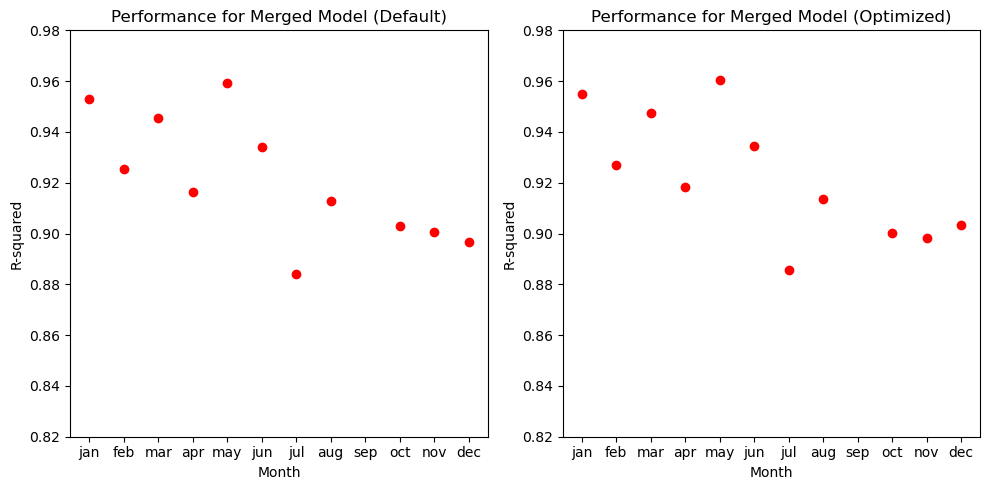

In [48]:
fig = plt.figure(figsize=(10, 5)) 
ax1 = plt.subplot(121)
for i, month in enumerate(months):
    ax1.scatter(i,r2_Months_default_merged[month],color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('R-squared')
x = list(range(0,12))
ax1.set_xticks(x,months)
ax1.set_ylim(0.82,0.98)

ax1.set_title('Performance for Merged Model (Default)')

ax2 = plt.subplot(122)
for i, month in enumerate(months):
    ax2.scatter(i,r2_Months_opt_merged[month],color='red')
ax2.set_xlabel('Month')
ax2.set_ylabel('R-squared')
x = list(range(0,12))
ax2.set_xticks(x,months)
ax2.set_ylim(0.82,0.98)
ax2.set_title('Performance for Merged Model (Optimized)')
plt.tight_layout()
plt.savefig('performance_merged_default_vs_opt.jpg', format = 'jpg', bbox_inches = 'tight')

In [39]:
# Calculate learning curve metrics

best_n_estimators_opt_merged = study_opt_merged_best_params['n_estimators']
best_max_depth_opt_merged = study_opt_merged_best_params['max_depth']
best_min_samples_split_opt_merged = study_opt_merged_best_params['min_samples_split']
best_min_samples_leaf_opt_merged = study_opt_merged_best_params['min_samples_leaf']

learning_curve_model_opt =  RandomForestRegressor(n_estimators = best_n_estimators_opt_merged, max_depth = best_max_depth_opt_merged , 
                                              min_samples_split= best_min_samples_split_opt_merged, 
                                              min_samples_leaf=best_min_samples_leaf_opt_merged, random_state=42, n_jobs=3)

train_sizes_opt, train_scores_opt, test_scores_opt = learning_curve(estimator = learning_curve_model_opt, X=X, y=y,
                                                       cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), verbose=3, n_jobs=3)

# Calculate training and test mean and std

train_mean_opt = np.mean(train_scores_opt, axis=1)
train_std_opt = np.std(train_scores_opt, axis=1)
test_mean_opt = np.mean(test_scores_opt, axis=1)
test_std_opt = np.std(test_scores_opt, axis=1)

[learning_curve] Training set sizes: [ 471  943 1415 1886 2358 2830 3301 3773 4245 4717]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  17 out of  50 | elapsed:  1.6min remaining:  3.0min
[Parallel(n_jobs=3)]: Done  34 out of  50 | elapsed:  2.9min remaining:  1.4min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  4.6min finished


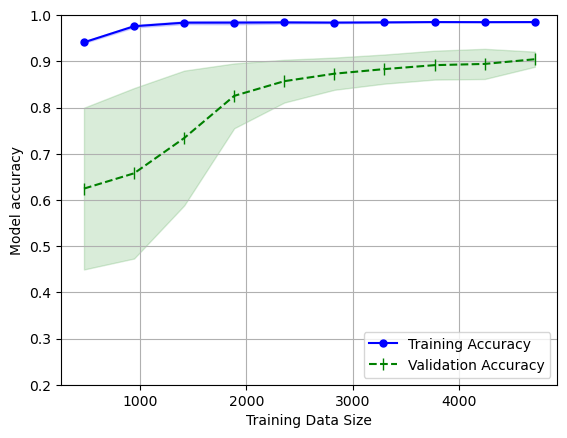

In [44]:
# Plot the learning curve

plt.plot(train_sizes_opt, train_mean_opt, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes_opt, train_mean_opt + train_std_opt, train_mean_opt - train_std_opt, alpha=0.15, color='blue')
plt.plot(train_sizes_opt, test_mean_opt, color='green', marker='|', markersize=8, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes_opt, test_mean_opt + test_std_opt, test_mean_opt - test_std_opt, alpha=0.15, color='green')
#plt.title('Learning Curve - Random Forest Method')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.ylim(0.2,1)
plt.grid()
plt.legend(loc='lower right')
plt.savefig('LearningCurve_opt_merged.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

In [41]:
with open('study_opt_merged', 'wb') as file:
        pickle.dump(study_opt_merged, file)

with open('study_opt_merged_best_params', 'wb') as file:
        pickle.dump(study_opt_merged_best_params, file)



In [21]:
study_opt_merged_best_params

{'n_estimators': 194,
 'max_depth': 37,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

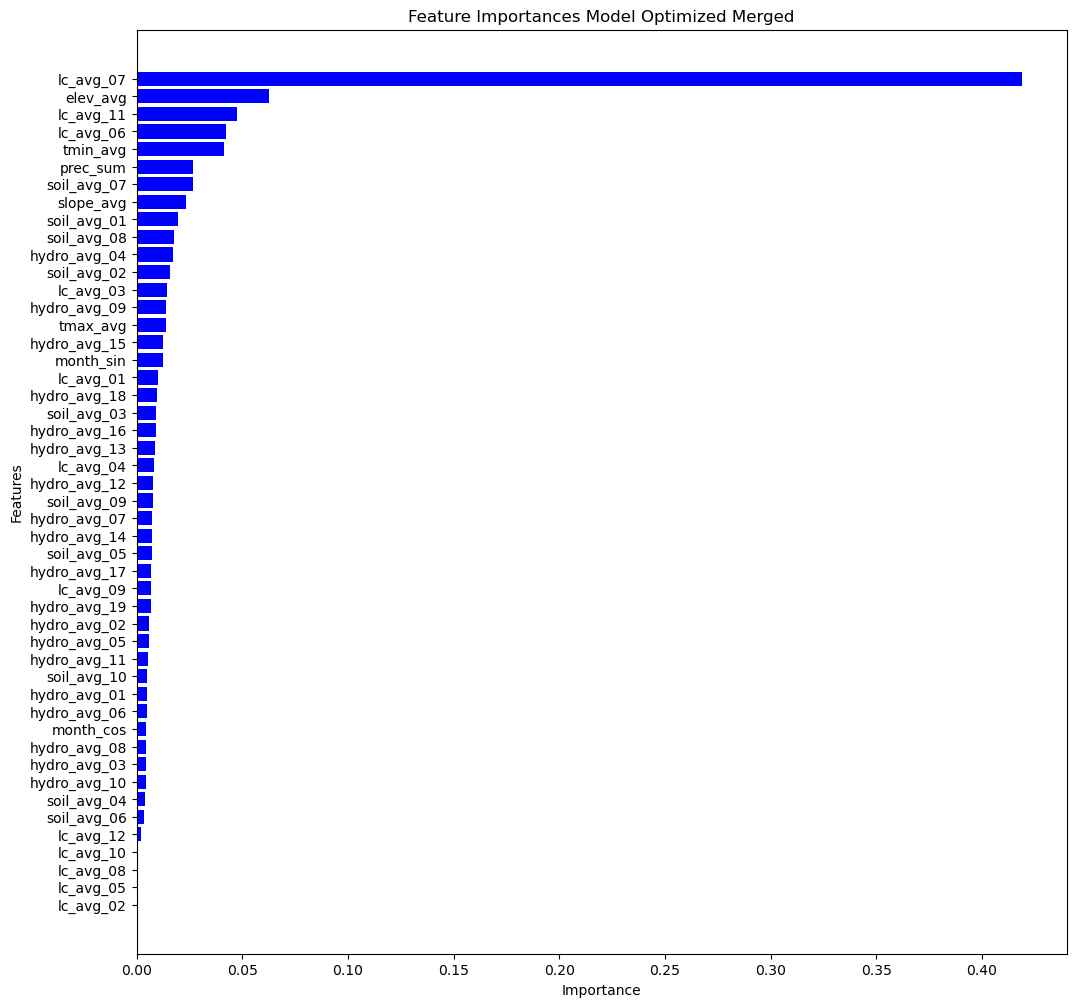

In [59]:
feature_importances_opt_merged = best_model_opt_merged.feature_importances_

indices = np.argsort(feature_importances_opt_merged)

# Prepare the figure
plt.figure(figsize=(12, 12))
plt.title('Feature Importances Model Optimized Merged')

# Create horizontal bars
plt.barh(range(len(indices)), feature_importances_opt_merged[indices], color='b', align='center')

# Add feature names as y-tick labels
plt.yticks(range(len(indices)), [merged_dfs.columns[8:][i] for i in indices])

# Label the axes
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('feature_importance_opt_merged.jpg', format = 'jpg', bbox_inches = 'tight')
# Show the plot
plt.show()

In [85]:
# Calculate spatial score

station_names = merged_dfs_scaled.station_name.unique()


df_test = merged_dfs_scaled.iloc[test_indices,:].reset_index(drop = True)  # Extract all the data in the test set dataframe and reset its index to match the indexy range of y_predict
df_train = merged_dfs_scaled.iloc[train_indices,:].reset_index(drop = True)
y_test_reset_ind = y_test.reset_index(drop = True)    # y_test had row indices of the original dataframe. Reset index to match index of y_predict

# save the data in a dictionary. keys are the station names. These dicts will later be used to generate figures.
rmse_stations_opt_merged = {}
r2_stations_opt_merged = {}
r_stations_opt_merged = {}
y_pred_stations_opt_merged = {}
y_test_stations_opt_merged = {}
df_stations_train = {}
df_stations_test = {}

for i,station_name in enumerate(station_names):

    df_test_station = df_test.loc[df_test['station_name'] == station_name,:]
    df_train_station = df_train.loc[df_train['station_name'] == station_name,:]
    df_test_station_indices = df_test_station.index 
    
    # only calculate the error metrics for a subset of the test set. Subset based on the given station. 
    y_test_station = y_test_reset_ind[df_test_station_indices]
    y_pred_station = y_pred_opt_merged[df_test_station_indices]
    
#     rmse_station_opt_merged = np.sqrt(mean_squared_error(y_test_station, y_pred_station))
#     r2_station_opt_merged = r2_score(y_test_station, y_pred_station)
#     r_station_opt_merged = pearson_corr_coeff(y_test_station, y_pred_station)
    
    
     # add data to the dictionaries
#     rmse_stations_opt_merged[station_name] = rmse_station_opt_merged
#     r2_stations_opt_merged[station_name] = r2_station_opt_merged
#     r_stations_opt_merged[station_name] = r_station_opt_merged
    y_pred_stations_opt_merged[station_name] = y_pred_station
    y_test_stations_opt_merged[station_name] = y_test_station
    df_stations_test[station_name] = df_test_station
    df_stations_train[station_name] = df_train_station
    
#     # print gof metrics for each month
#     print(f'RMSE default for {station_name} = {np.round(rmse_stations_opt_merged[station_name],5)}')
#     print(f'R2 default for {station_name} = {np.round(r2_stations_opt_merged[station_name],5)}')
#     print(f'R default for {station_name} = {np.round(r_stations_opt_merged[station_name], 5)}')
#     print('')

NameError: name 'y_pred_opt_merged' is not defined

In [108]:
df_stations_train['Gemünden oh. Sinnmündung']

,NO3-N [mg/l],NO3-N [mg/l] BC,month,station_name,station_number,water_body,lat,lon,slope_avg,elev_avg,...,soil_avg_06,soil_avg_07,soil_avg_08,soil_avg_09,soil_avg_10,tmin_avg,tmax_avg,prec_sum,month_sin,month_cos
238,4.599765,2.090307,12,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,-0.897336,-1.213868,-0.107666,0.000392,1.413766
834,4.201282,1.915677,5,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,0.543240,0.813663,-0.108419,0.707679,-1.224521
1006,4.778286,2.161228,1,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,-1.253243,-1.381753,-0.152427,0.707679,1.224346
1032,4.091789,1.883110,9,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,0.814407,0.916977,-0.147519,-1.414182,-0.000088
1202,4.162167,1.907971,4,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,-0.117730,0.180867,-0.150946,1.225449,-0.707015
1231,3.860447,1.772242,7,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,1.407585,1.420632,-0.084219,-0.706895,-1.224521
1484,4.061722,1.863551,6,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,1.102522,1.239833,-0.042120,0.000392,-1.413942
2476,3.952103,1.819812,8,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,1.322845,1.368975,-0.096364,-1.224665,-0.707015
2489,4.135189,1.899850,10,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,0.153437,0.116296,-0.136245,-1.224665,0.706839
2954,4.489459,2.043324,3,Gemünden oh. Sinnmündung,21142,Fränkische Saale,50.0625,9.695833,-0.139619,-0.854198,...,-0.240589,0.415158,0.651022,0.121737,0.056019,-0.693960,-0.451930,-0.157871,1.414966,-0.000088
